# Lunar Lander

![title](lunar_lander_pic.png)

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('LunarLander-v2')

In [3]:
# Env Actions
directions = {"Null":0,"Left":1,"Up":2,"Right":3}
env.action_space

Discrete(4)

In [4]:
# Env Observation
obs = {"xCoordinate":0,"yCoordinate":1,"xVelocity":2,"yVelocity":3,"Angle":4,"AngularVelocity":5,"leftLegContact":6,"rightLegContact":7}
env.observation_space

Box(-inf, inf, (8,), float32)

In [5]:
# Random Acceleration Policy
env.reset()
for i in range(100):
    action = env.action_space.sample()
    env.step(action)
    env.render()
    time.sleep(0.01)
    
env.close()

# Connect to CAS

In [6]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [7]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [8]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.331s, user: 0.737s, sys: 1.07s, mem: 0.255mb

# Train the Agent - Deep Q Networks

In [9]:
# results = conn.reinforcementLearn.rlTrainDqn(
    
#     # RL Arguments
#     environment=dict(type='remote', url=sasrl_env_url, name='LunarLander-v2', render=False, seed=802),
#     exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
#     gamma = 0.99,
#     numEpisodes = 1000,
    
#     # NN Arguments
#     QModel=[{'type':'FC', 'n':64, 'act':'RELU'},
#             {'type':'FC', 'n':128, 'act':'RELU'}],
#     optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
#     minReplayMemory = 100,
#     maxReplayMemory = 10000,
#     targetUpdateInterval = 10,
    
#     # Test Arguments
#     testInterval = 10,
#     numTestEpisodes = 1,
    
#     # Other Arguments
#     modelOut=dict(name='dqn_weights', replace=True),
#     seed = 919
    
# )

# Save the Model

In [10]:
# Add a CASlib
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Save Optimization History
# pd.DataFrame(results["OptIterHistory"]).to_csv("D:/Workshop/Winsas/VOSI/lunar_lander_opthist.csv", index=False)

In [12]:
# Save DQN Weights
# conn.table.save(caslib = 'mycl', table = 'dqn_weights', name = 'lunar_lander_dqn_weights', replace = True)
# conn.table.attribute(caslib = 'CASUSER', table = 'lunar_lander_dqn_weights_attr', name = 'dqn_weights', task='convert')
# conn.table.save(caslib = 'mycl', table = 'lunar_lander_dqn_weights_attr', name = 'lunar_lander_dqn_weights_attr', replace = True)

# Load the Model

In [13]:
# Load Optimization History
results = pd.read_csv("D:/Workshop/Winsas/VOSI/lunar_lander_opthist.csv")

In [14]:
# Load DQN Weights
conn.table.loadTable(caslib = 'mycl', path="lunar_lander_dqn_weights.sashdat", casOut=dict(name="dqn_weights", replace=True))
conn.table.loadTable(caslib = 'mycl', path="lunar_lander_dqn_weights_attr.sashdat", casOut=dict(name="dqn_weights_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='dqn_weights', attrtable='dqn_weights_attr')

NOTE: Cloud Analytic Services made the file lunar_lander_dqn_weights.sashdat available as table DQN_WEIGHTS in caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file lunar_lander_dqn_weights_attr.sashdat available as table DQN_WEIGHTS_ATTR in caslib CASUSER(student).


+ Elapsed: 0.000962s, user: 0.000745s, sys: 0.000171s, mem: 0.309mb

# View Results

In [15]:
results

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-0.124048,-0.491482,2.275242,-1909.136892
1,10,58.925587,58.342211,28.663717,-608.910742
2,20,48.934415,49.157806,31.675872,-130.081408
3,30,56.775253,56.380495,39.662605,-125.705897
4,40,53.166367,52.715969,75.544148,-124.679166
...,...,...,...,...,...
96,960,92.825393,93.336861,16.093421,-490.609274
97,970,79.210203,79.384480,22.900071,-68.932835
98,980,114.523825,116.197374,16.960523,-216.781586
99,990,94.205567,93.411904,21.151787,230.563102


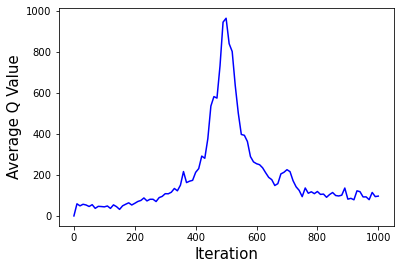

In [16]:
plt.plot(results['Iteration'],results['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

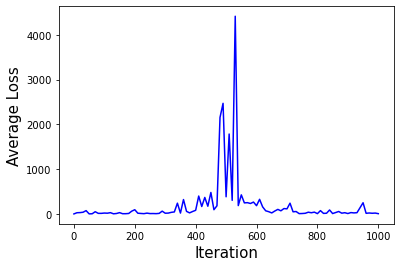

In [17]:
plt.plot(results['Iteration'],results['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

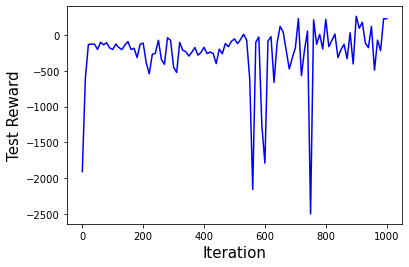

In [18]:
plt.plot(results['Iteration'],results['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [19]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='LunarLander-v2', 
                     render=True, renderFreq=10, renderSleep=0, seed=123),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=1.2822
         Episode=        1 Step=        2 LastReward=     0 AverageReward= 1.412
         Episode=        1 Step=        3 LastReward=     0 AverageReward=3.5502
         Episode=        1 Step=        4 LastReward=     0 AverageReward=3.9953
         Episode=        1 Step=        5 LastReward=     0 AverageReward=3.0267
         Episode=        1 Step=        6 LastReward=     0 AverageReward=2.3992
         Episode=        1 Step=        7 LastReward=     0 AverageReward=2.3931
         Episode=        1 Step=        8 LastReward=     0 AverageReward=2.5833
         Episode=        1 Step=        9 LastReward=     0 AverageReward=2.1528
         Episode=        1 Step=       10 LastReward=     0 AverageReward=0.5642
         Episode=        1 Step=       11 LastReward=     0 AverageReward=0.4326
         Episode=        1 Step=       12 LastReward=     0 AverageReward=1.9383
         Episode=        1 S

,Property,Value
0,Number of State Variables,8
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [20]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_State_4,_State_5,_State_6,_State_7,_Action_,_Reward_,_Done_
0,0.0,1.0,0.002145,1.405316,2.172946e-01,-2.490651e-01,-0.002479,-4.922046e-02,0.0,0.0,2.0,1.282177e+00,0.0
1,1.0,1.0,0.004425,1.400375,2.297803e-01,-2.196101e-01,-0.004275,-3.592522e-02,0.0,0.0,2.0,1.297888e-01,0.0
2,2.0,1.0,0.006667,1.395394,2.262525e-01,-2.213774e-01,-0.006257,-3.963367e-02,0.0,0.0,2.0,2.138232e+00,0.0
3,3.0,1.0,0.008942,1.391239,2.293367e-01,-1.846691e-01,-0.008112,-3.711239e-02,0.0,0.0,2.0,4.451238e-01,0.0
4,4.0,1.0,0.011294,1.387503,2.367712e-01,-1.660674e-01,-0.009621,-3.018329e-02,0.0,0.0,2.0,-9.686713e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398.0,1.0,0.060352,-0.000116,-3.768585e-09,-4.063783e-09,0.006358,1.212588e-08,1.0,1.0,0.0,1.528402e-07,0.0
399,399.0,1.0,0.060352,-0.000116,-7.525897e-08,3.989312e-10,0.006358,8.983687e-08,1.0,1.0,0.0,6.155443e-06,0.0
400,400.0,1.0,0.060352,-0.000116,-8.262332e-08,-1.528605e-10,0.006358,9.506708e-08,1.0,1.0,0.0,6.766660e-06,0.0
401,401.0,1.0,0.060352,-0.000116,-6.152298e-08,-5.713690e-11,0.006358,8.526064e-08,1.0,1.0,0.0,5.707138e-06,0.0


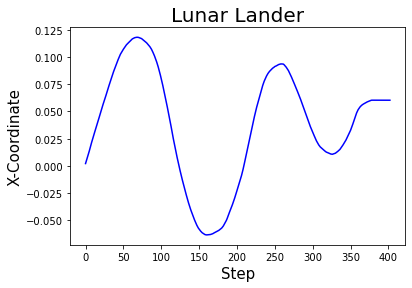

In [21]:
plt.plot(df["_State_0"], color="blue")
plt.title("Lunar Lander", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("X-Coordinate", fontsize=15)
plt.show()

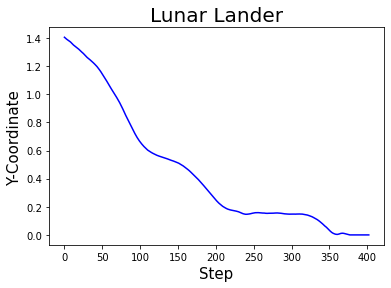

In [22]:
plt.plot(df["_State_1"], color="blue")
plt.title("Lunar Lander", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Y-Coordinate", fontsize=15)
plt.show()

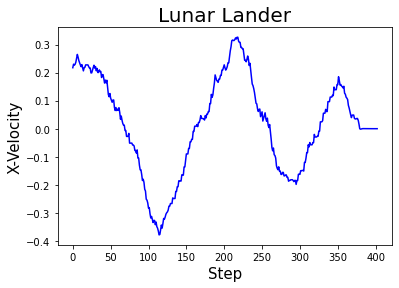

In [23]:
plt.plot(df["_State_2"], color="blue")
plt.title("Lunar Lander", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("X-Velocity", fontsize=15)
plt.show()

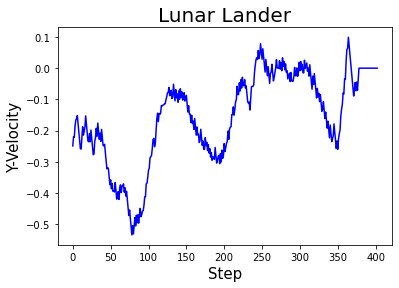

In [24]:
plt.plot(df["_State_3"], color="blue")
plt.title("Lunar Lander", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Y-Velocity", fontsize=15)
plt.show()

# End the Session

In [25]:
conn.session.endSession()

+ Elapsed: 0.000403s, user: 0.000335s, mem: 0.221mb